## Predict Blood Glucose Levels Based on PPG Signals 

Predicting Blood Glucose Levels Based on PPG Signals" involves using Photoplethysmogram (PPG) data—captured by sensors that measure changes in blood volume—to estimate glucose levels in the body. By analyzing features of the PPG waveform, a machine learning model can predict blood glucose levels, offering a non-invasive approach to monitoring glucose, which is especially useful for diabetes management

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ppg-signal-with-blood-sugar-level-data/clean-dataset.csv
/kaggle/input/ppg-signal-with-blood-sugar-level-data/archive (2)/PPG_Dataset/Labels/label_21_0001.mat
/kaggle/input/ppg-signal-with-blood-sugar-level-data/archive (2)/PPG_Dataset/Labels/label_09_0002.mat
/kaggle/input/ppg-signal-with-blood-sugar-level-data/archive (2)/PPG_Dataset/Labels/label_07_0001.csv
/kaggle/input/ppg-signal-with-blood-sugar-level-data/archive (2)/PPG_Dataset/Labels/label_13_0002.mat
/kaggle/input/ppg-signal-with-blood-sugar-level-data/archive (2)/PPG_Dataset/Labels/label_14_0002.csv
/kaggle/input/ppg-signal-with-blood-sugar-level-data/archive (2)/PPG_Dataset/Labels/label_18_0002.csv
/kaggle/input/ppg-signal-with-blood-sugar-level-data/archive (2)/PPG_Dataset/Labels/label_05_0006.mat
/kaggle/input/ppg-signal-with-blood-sugar-level-data/archive (2)/PPG_Dataset/Labels/label_01_0001.mat
/kaggle/input/ppg-signal-with-blood-sugar-level-data/archive (2)/PPG_Dataset/Labels/label_18_0003.mat
/kaggle/inp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/ppg-signal-with-blood-sugar-level-data/clean-dataset.csv')

In [4]:
df.dtypes

PPG_Signal          int64
Patient_Id          int64
Heart_Rate        float64
Systolic_Peak     float64
Diastolic_Peak    float64
Pulse_Area        float64
index               int64
Gender              int64
Age                 int64
Glucose_level       int64
Height              int64
Weight              int64
pl                  int64
dtype: object

In [5]:
df

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Age,Glucose_level,Height,Weight,pl
0,511,1,77.0,522.0,505.0,393.0,0,1,38,99,180,53,1
1,511,1,77.0,522.0,505.0,393.0,1,1,38,102,180,53,2
2,511,1,77.0,522.0,505.0,393.0,2,1,38,103,180,53,3
3,511,1,77.0,522.0,505.0,393.0,3,1,38,128,180,53,4
4,511,1,77.0,522.0,505.0,393.0,4,1,38,130,180,53,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,27,108,173,57,1463368
844942,513,23,83.0,516.0,510.0,366.0,42,1,27,100,173,57,1463369
844943,513,23,83.0,516.0,510.0,366.0,43,1,27,108,173,57,1463370
844944,513,23,83.0,516.0,510.0,366.0,42,1,27,100,173,57,1463371


In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
PPG_Signal        0
Patient_Id        0
Heart_Rate        0
Systolic_Peak     0
Diastolic_Peak    0
Pulse_Area        0
index             0
Gender            0
Age               0
Glucose_level     0
Height            0
Weight            0
pl                0
dtype: int64


In [7]:
#Loop through each column and print the unique values
for column in df.columns:
    unique_values = df[column].unique()
    count_values  = len(df[column].unique())
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")
    print(f"total count unique values : { count_values}\n")

Column: PPG_Signal
Unique Values: [511 512 513 514 515 516 517 510 509 508 507 506]

total count unique values : 12

Column: Patient_Id
Unique Values: [ 1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

total count unique values : 22

Column: Heart_Rate
Unique Values: [77. 75. 80. 79. 81. 76. 83. 65. 61. 63. 70. 85. 84. 88. 86. 89. 93. 87.
 90. 78. 82. 64. 67. 68. 66. 74. 73. 71. 91. 62. 72. 92.]

total count unique values : 32

Column: Systolic_Peak
Unique Values: [522. 520. 521. 518. 519. 524. 523. 526. 525. 527. 528. 516. 514. 515.
 517. 529.]

total count unique values : 16

Column: Diastolic_Peak
Unique Values: [505. 507. 508. 506. 509. 504. 511. 510. 512.]

total count unique values : 9

Column: Pulse_Area
Unique Values: [393.  406.  383.  385.  386.  375.  394.  380.  376.  396.  399.  369.
 468.  481.5 467.  438.  434.  355.  398.  365.  347.  356.  353.  379.
 345.  363.  367.  364.  378.  312.  370.  349.  377.  366.  321.  324.
 338.  390.  388.  374.  381. 

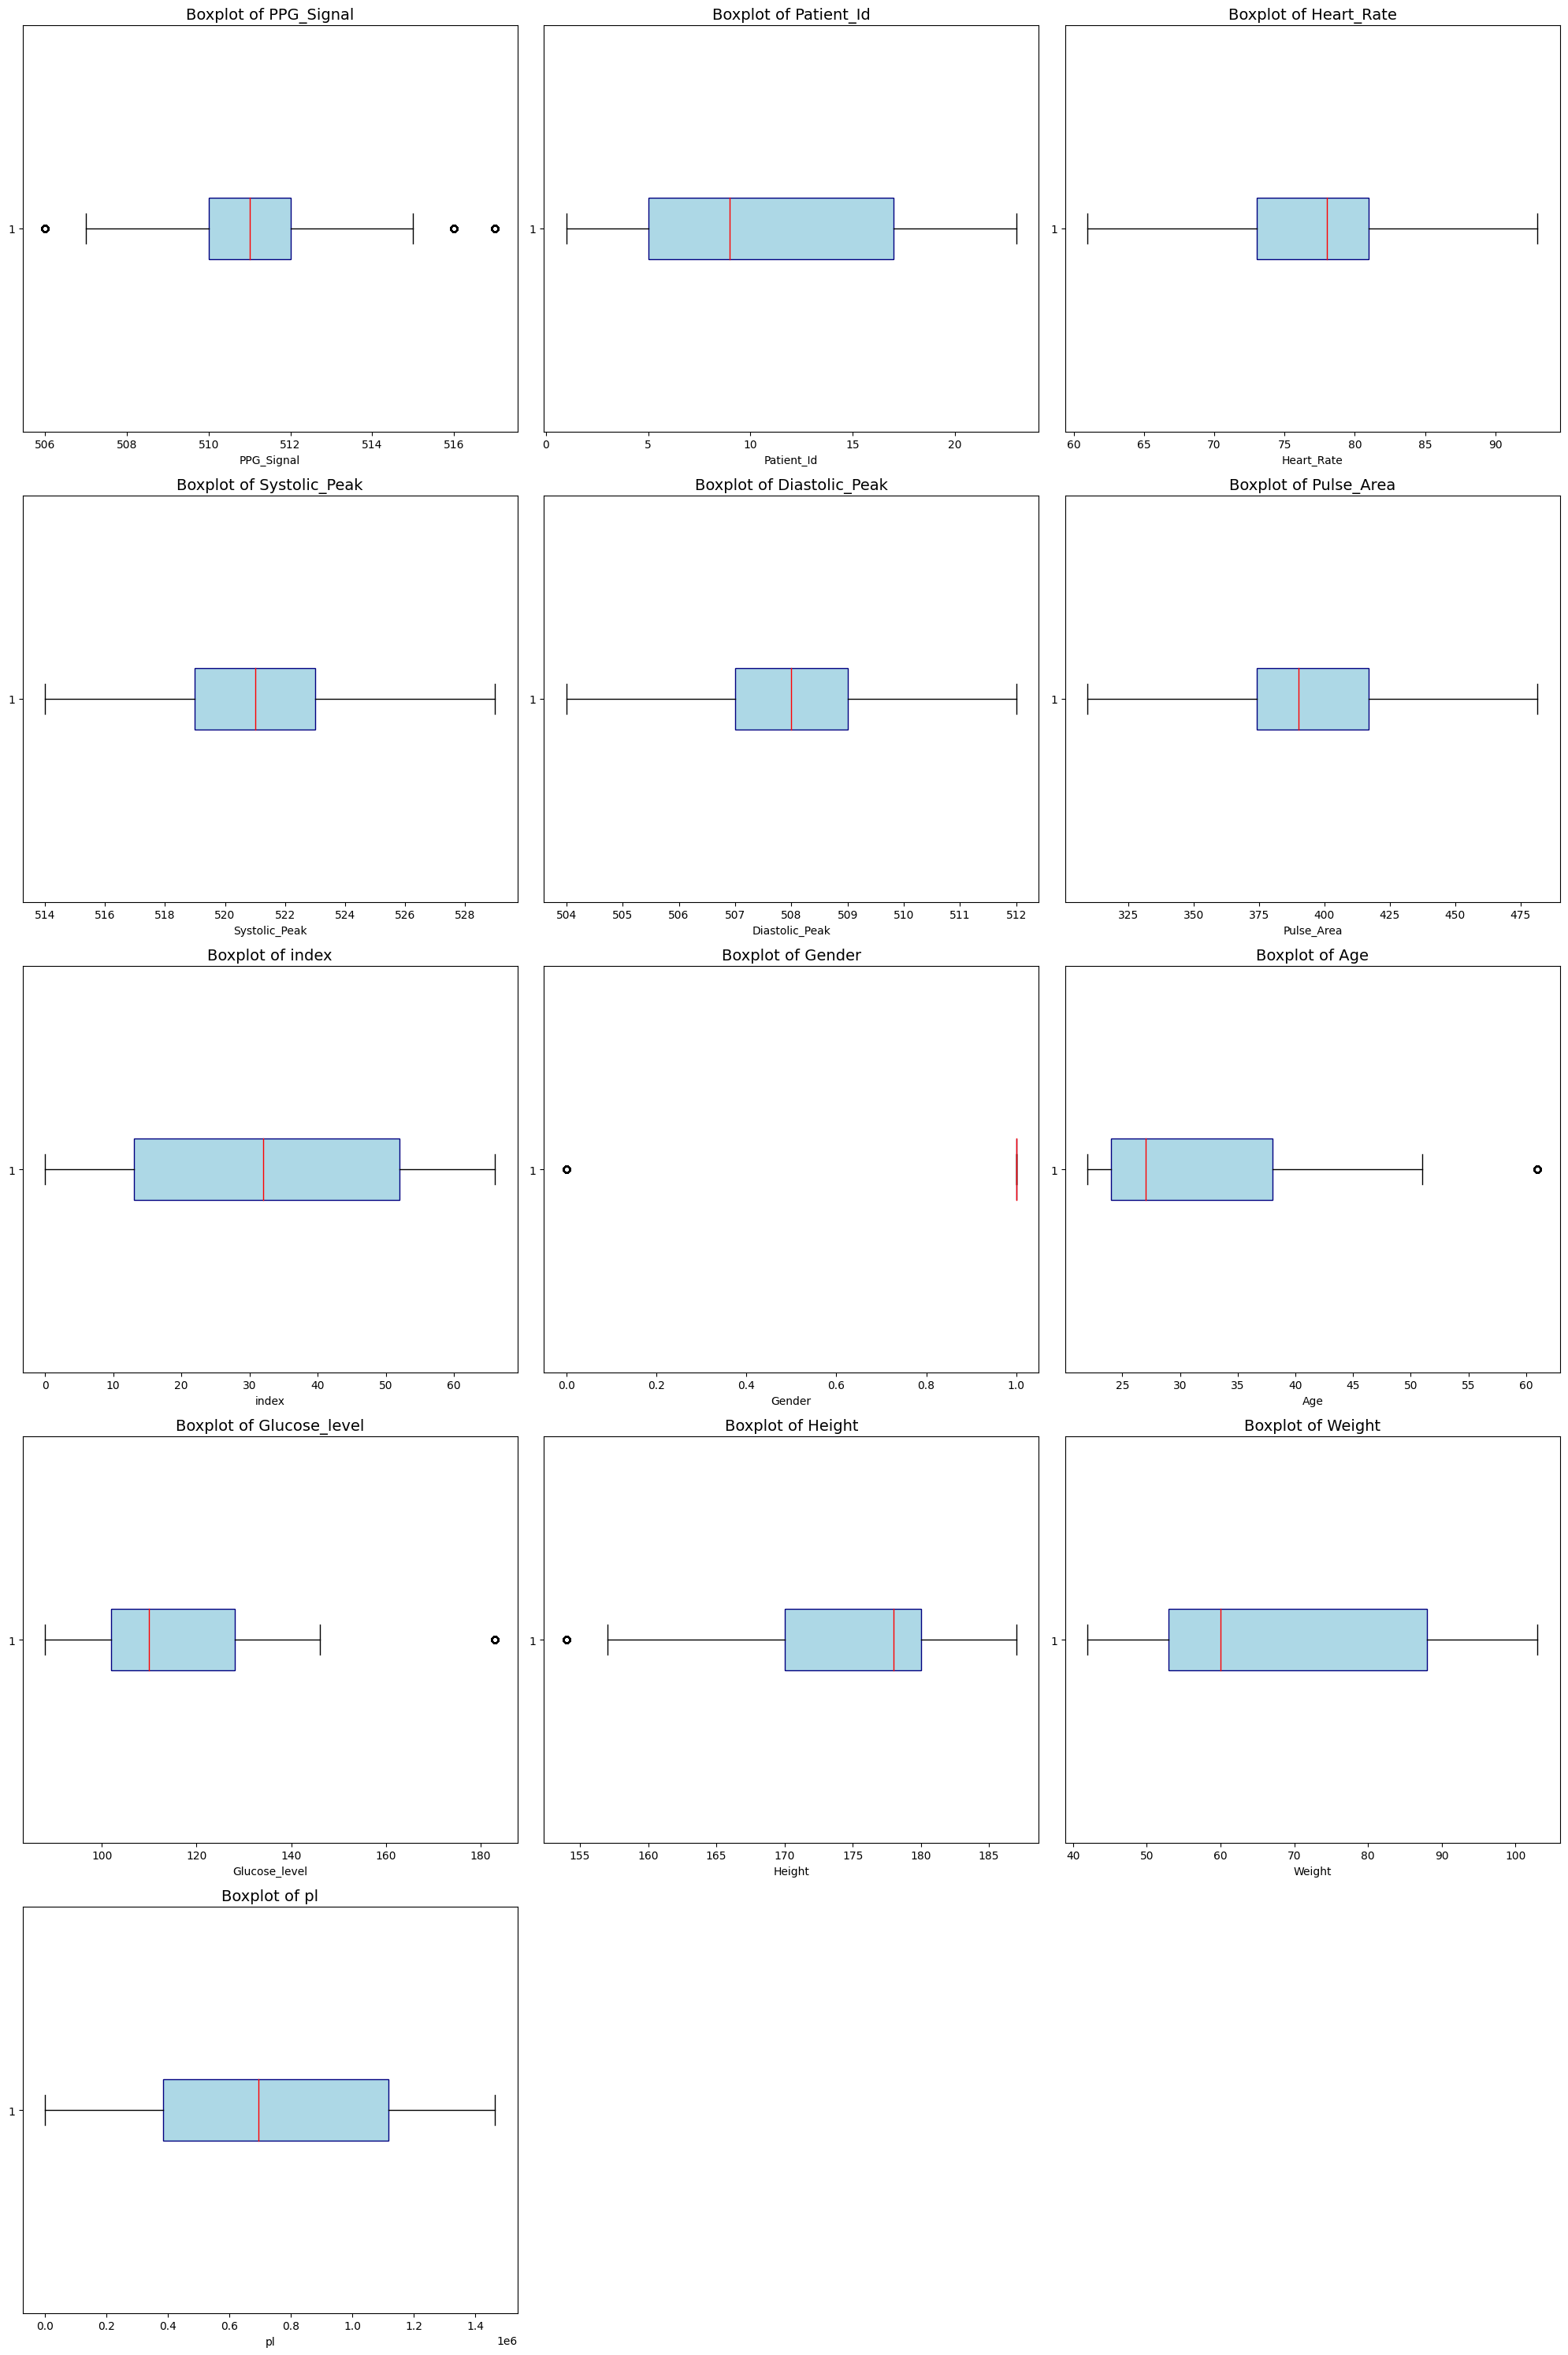

In [8]:
def plot_boxplots_alternative(df):
    num_columns = df.select_dtypes(include='number').columns
    num_features = len(num_columns)
    rows = (num_features // 3) + 1
    cols = min(num_features, 3)
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6))
    axes = axes.flatten()  # Flatten in case of more subplots
    
    for i, col in enumerate(num_columns):
        axes[i].boxplot(df[col], vert=False, patch_artist=True,
                        boxprops=dict(facecolor='lightblue', color='navy'),
                        medianprops=dict(color='red'))
        axes[i].set_title(f'Boxplot of {col}', fontsize=14)
        axes[i].set_xlabel(col)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_boxplots_alternative(df)

In [9]:
#import seaborn as sns
#plt.figure(figsize=(20,35))
#for i, col in enumerate(df.columns):
    #if df[col].dtype != 'object':
        #ax = plt.subplot(9, 2, i+1)
        #sns.kdeplot(df[col], ax=ax)
        #plt.xlabel(col)
        
#plt.show()

In [10]:
# Create a new column for BMI
#df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [11]:
df

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Age,Glucose_level,Height,Weight,pl
0,511,1,77.0,522.0,505.0,393.0,0,1,38,99,180,53,1
1,511,1,77.0,522.0,505.0,393.0,1,1,38,102,180,53,2
2,511,1,77.0,522.0,505.0,393.0,2,1,38,103,180,53,3
3,511,1,77.0,522.0,505.0,393.0,3,1,38,128,180,53,4
4,511,1,77.0,522.0,505.0,393.0,4,1,38,130,180,53,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,27,108,173,57,1463368
844942,513,23,83.0,516.0,510.0,366.0,42,1,27,100,173,57,1463369
844943,513,23,83.0,516.0,510.0,366.0,43,1,27,108,173,57,1463370
844944,513,23,83.0,516.0,510.0,366.0,42,1,27,100,173,57,1463371


In [12]:
# Drop columns without modifying the original DataFrame
#merged_df1 = merged_df1.drop(columns=['pl'])
# Drop columns without modifying the original DataFrame
#df = df.drop(columns=['Weight','Height'])

# Check the result
#df.head()

In [13]:
import pandas as pd


# Define the bins (age ranges) and the corresponding labels
bins = [20, 30, 40, 50, 60,70]  # Age ranges (e.g., 0-20, 21-30, etc.)
labels = [1,2,3,4,5]  # Corresponding labels

# Create a new column 'Age Range' based on the age values
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'Age Range' column
print(df)


        PPG_Signal  Patient_Id  Heart_Rate  Systolic_Peak  Diastolic_Peak  \
0              511           1        77.0          522.0           505.0   
1              511           1        77.0          522.0           505.0   
2              511           1        77.0          522.0           505.0   
3              511           1        77.0          522.0           505.0   
4              511           1        77.0          522.0           505.0   
...            ...         ...         ...            ...             ...   
844941         513          23        83.0          516.0           510.0   
844942         513          23        83.0          516.0           510.0   
844943         513          23        83.0          516.0           510.0   
844944         513          23        83.0          516.0           510.0   
844945         513          23        83.0          516.0           510.0   

        Pulse_Area  index  Gender  Age  Glucose_level  Height  Weight  \
0 

In [14]:
df

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Age,Glucose_level,Height,Weight,pl,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,38,99,180,53,1,2
1,511,1,77.0,522.0,505.0,393.0,1,1,38,102,180,53,2,2
2,511,1,77.0,522.0,505.0,393.0,2,1,38,103,180,53,3,2
3,511,1,77.0,522.0,505.0,393.0,3,1,38,128,180,53,4,2
4,511,1,77.0,522.0,505.0,393.0,4,1,38,130,180,53,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,27,108,173,57,1463368,1
844942,513,23,83.0,516.0,510.0,366.0,42,1,27,100,173,57,1463369,1
844943,513,23,83.0,516.0,510.0,366.0,43,1,27,108,173,57,1463370,1
844944,513,23,83.0,516.0,510.0,366.0,42,1,27,100,173,57,1463371,1


In [15]:
# Drop columns without modifying the original DataFrame
df = df.drop(columns=['Age'])

# Check the result
df.head()

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Glucose_level,Height,Weight,pl,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,99,180,53,1,2
1,511,1,77.0,522.0,505.0,393.0,1,1,102,180,53,2,2
2,511,1,77.0,522.0,505.0,393.0,2,1,103,180,53,3,2
3,511,1,77.0,522.0,505.0,393.0,3,1,128,180,53,4,2
4,511,1,77.0,522.0,505.0,393.0,4,1,130,180,53,5,2


In [16]:
df.columns

Index(['PPG_Signal', 'Patient_Id', 'Heart_Rate', 'Systolic_Peak',
       'Diastolic_Peak', 'Pulse_Area', 'index', 'Gender', 'Glucose_level',
       'Height', 'Weight', 'pl', 'Age Range'],
      dtype='object')

### Remove Outlier in dataset 

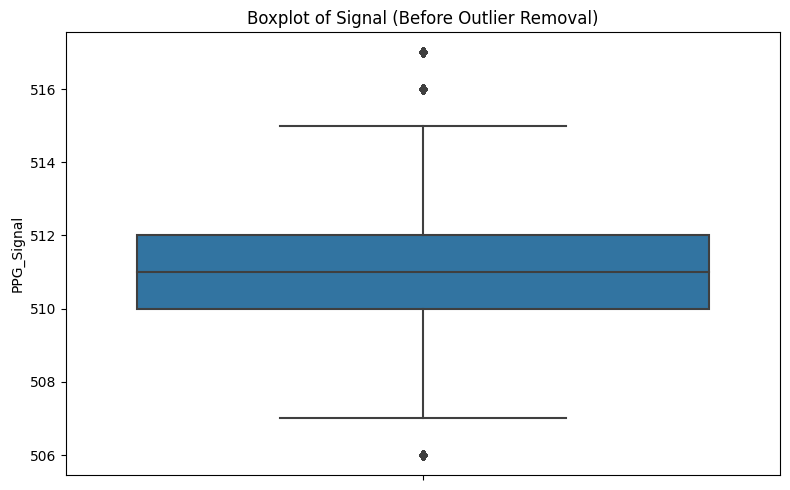

Outliers Found at Indices:
Index([   769,    770,    771,    772,    773,    774,    775,    776,    777,
          778,
       ...
       814354, 814355, 814356, 814357, 814358, 814359, 814360, 814361, 814362,
       814363],
      dtype='int64', length=48385)

Rows containing outliers:
        PPG_Signal  Patient_Id  Heart_Rate  Systolic_Peak  Diastolic_Peak  \
769            516           1        77.0          522.0           505.0   
770            516           1        77.0          522.0           505.0   
771            516           1        77.0          522.0           505.0   
772            516           1        77.0          522.0           505.0   
773            516           1        77.0          522.0           505.0   
...            ...         ...         ...            ...             ...   
814359         506          22        73.0          528.0           508.0   
814360         506          22        73.0          528.0           508.0   
814361         506

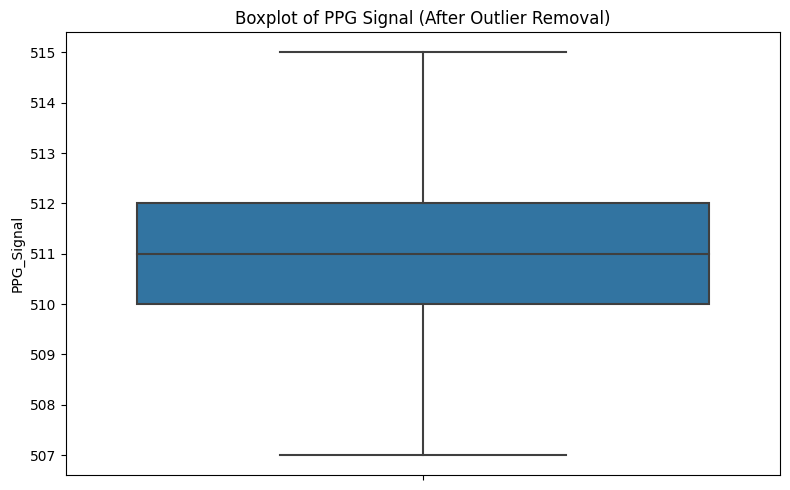

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a synthetic dataset (replace with your actual dataset)
np.random.seed(42)

# Print available columns to verify if 'Signal' is present
#print("Columns in the dataset:", df.columns)

# List of columns to handle outliers (in this case, just the 'Signal' column)
columns_with_outliers = ['PPG_Signal']

# Create a boxplot for the 'Signal' column before handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['PPG_Signal'])
plt.title('Boxplot of Signal (Before Outlier Removal)')
plt.tight_layout()
plt.show()

# Define a function to handle outliers using the IQR method
def find_outliers(df, column, iqr_multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    # Identify the indices of rows that are outliers
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outlier_indices

# Find the outliers in the 'Signal' column
outlier_indices = find_outliers(df, 'PPG_Signal')

# Show the dataset rows that contain outliers
print("Outliers Found at Indices:")
print(outlier_indices)

# Show dataset rows containing the outliers
print("\nRows containing outliers:")
print(df.loc[outlier_indices])

# Remove outliers from the dataset
df = df.drop(outlier_indices)

# Print the size of the dataset after removing outliers
print("\nDataset size after removing outliers:", df.shape)

# Create a boxplot for the 'Signal' column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['PPG_Signal'])
plt.title('Boxplot of PPG Signal (After Outlier Removal)')
plt.tight_layout()
plt.show()

# Optional: Save the cleaned data to a new CSV
# df_no_outliers.to_csv('/mnt/data/cleaned_data.csv', index=False)


In [18]:
df

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Glucose_level,Height,Weight,pl,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,99,180,53,1,2
1,511,1,77.0,522.0,505.0,393.0,1,1,102,180,53,2,2
2,511,1,77.0,522.0,505.0,393.0,2,1,103,180,53,3,2
3,511,1,77.0,522.0,505.0,393.0,3,1,128,180,53,4,2
4,511,1,77.0,522.0,505.0,393.0,4,1,130,180,53,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1463368,1
844942,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1463369,1
844943,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1463370,1
844944,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1463371,1


In [19]:
df.columns

Index(['PPG_Signal', 'Patient_Id', 'Heart_Rate', 'Systolic_Peak',
       'Diastolic_Peak', 'Pulse_Area', 'index', 'Gender', 'Glucose_level',
       'Height', 'Weight', 'pl', 'Age Range'],
      dtype='object')

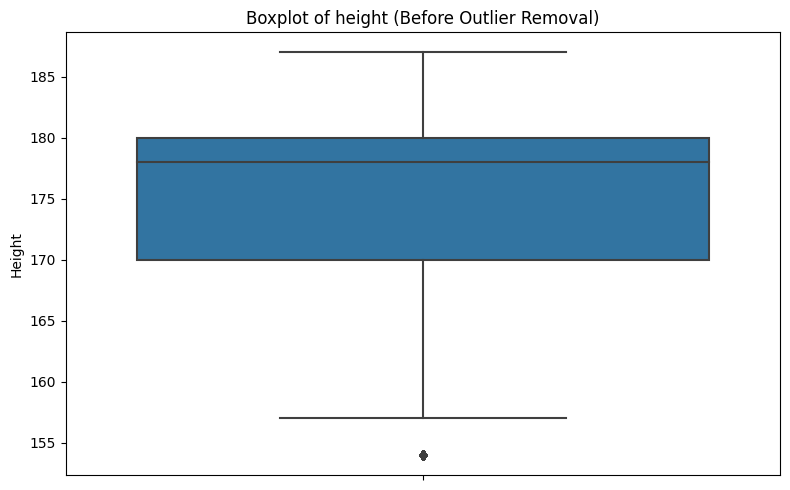

Outliers Found at Indices:
Index([704505, 704506, 704507, 704508, 704509, 704510, 704511, 704512, 704513,
       704514,
       ...
       731761, 731762, 731763, 731764, 731765, 731766, 731767, 731768, 731769,
       731770],
      dtype='int64', length=24985)

Rows containing outliers:
        PPG_Signal  Patient_Id  Heart_Rate  Systolic_Peak  Diastolic_Peak  \
704505         510          20        79.0          521.0           506.0   
704506         510          20        79.0          521.0           506.0   
704507         510          20        79.0          521.0           506.0   
704508         510          20        79.0          521.0           506.0   
704509         510          20        79.0          521.0           506.0   
...            ...         ...         ...            ...             ...   
731766         507          20        65.0          521.0           507.0   
731767         507          20        65.0          521.0           507.0   
731768         507

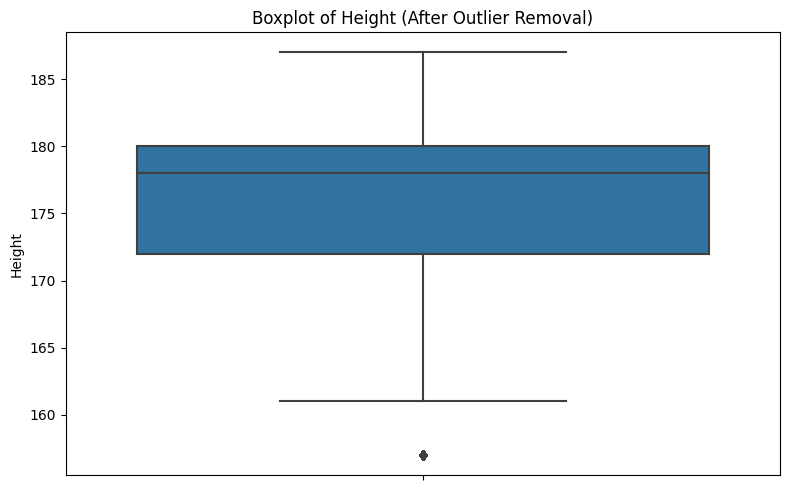

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a synthetic dataset (replace with your actual dataset)
np.random.seed(42)

# Print available columns to verify if 'Signal' is present
#print("Columns in the dataset:", df.columns)

# List of columns to handle outliers (in this case, just the 'Signal' column)
columns_with_outliers = ['Height']

# Create a boxplot for the 'Signal' column before handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Height'])
plt.title('Boxplot of height (Before Outlier Removal)')
plt.tight_layout()
plt.show()

# Define a function to handle outliers using the IQR method
def find_outliers(df, column, iqr_multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    # Identify the indices of rows that are outliers
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outlier_indices

# Find the outliers in the 'Signal' column
outlier_indices = find_outliers(df, 'Height')

# Show the dataset rows that contain outliers
print("Outliers Found at Indices:")
print(outlier_indices)

# Show dataset rows containing the outliers
print("\nRows containing outliers:")
print(df.loc[outlier_indices])

# Remove outliers from the dataset
df = df.drop(outlier_indices)

# Print the size of the dataset after removing outliers
print("\nDataset size after removing outliers:", df.shape)

# Create a boxplot for the 'Signal' column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Height'])
plt.title('Boxplot of Height (After Outlier Removal)')
plt.tight_layout()
plt.show()

# Optional: Save the cleaned data to a new CSV
# df_no_outliers.to_csv('/mnt/data/cleaned_data.csv', index=False)


In [21]:
df

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Glucose_level,Height,Weight,pl,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,99,180,53,1,2
1,511,1,77.0,522.0,505.0,393.0,1,1,102,180,53,2,2
2,511,1,77.0,522.0,505.0,393.0,2,1,103,180,53,3,2
3,511,1,77.0,522.0,505.0,393.0,3,1,128,180,53,4,2
4,511,1,77.0,522.0,505.0,393.0,4,1,130,180,53,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1463368,1
844942,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1463369,1
844943,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1463370,1
844944,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1463371,1


In [22]:
df.columns

Index(['PPG_Signal', 'Patient_Id', 'Heart_Rate', 'Systolic_Peak',
       'Diastolic_Peak', 'Pulse_Area', 'index', 'Gender', 'Glucose_level',
       'Height', 'Weight', 'pl', 'Age Range'],
      dtype='object')

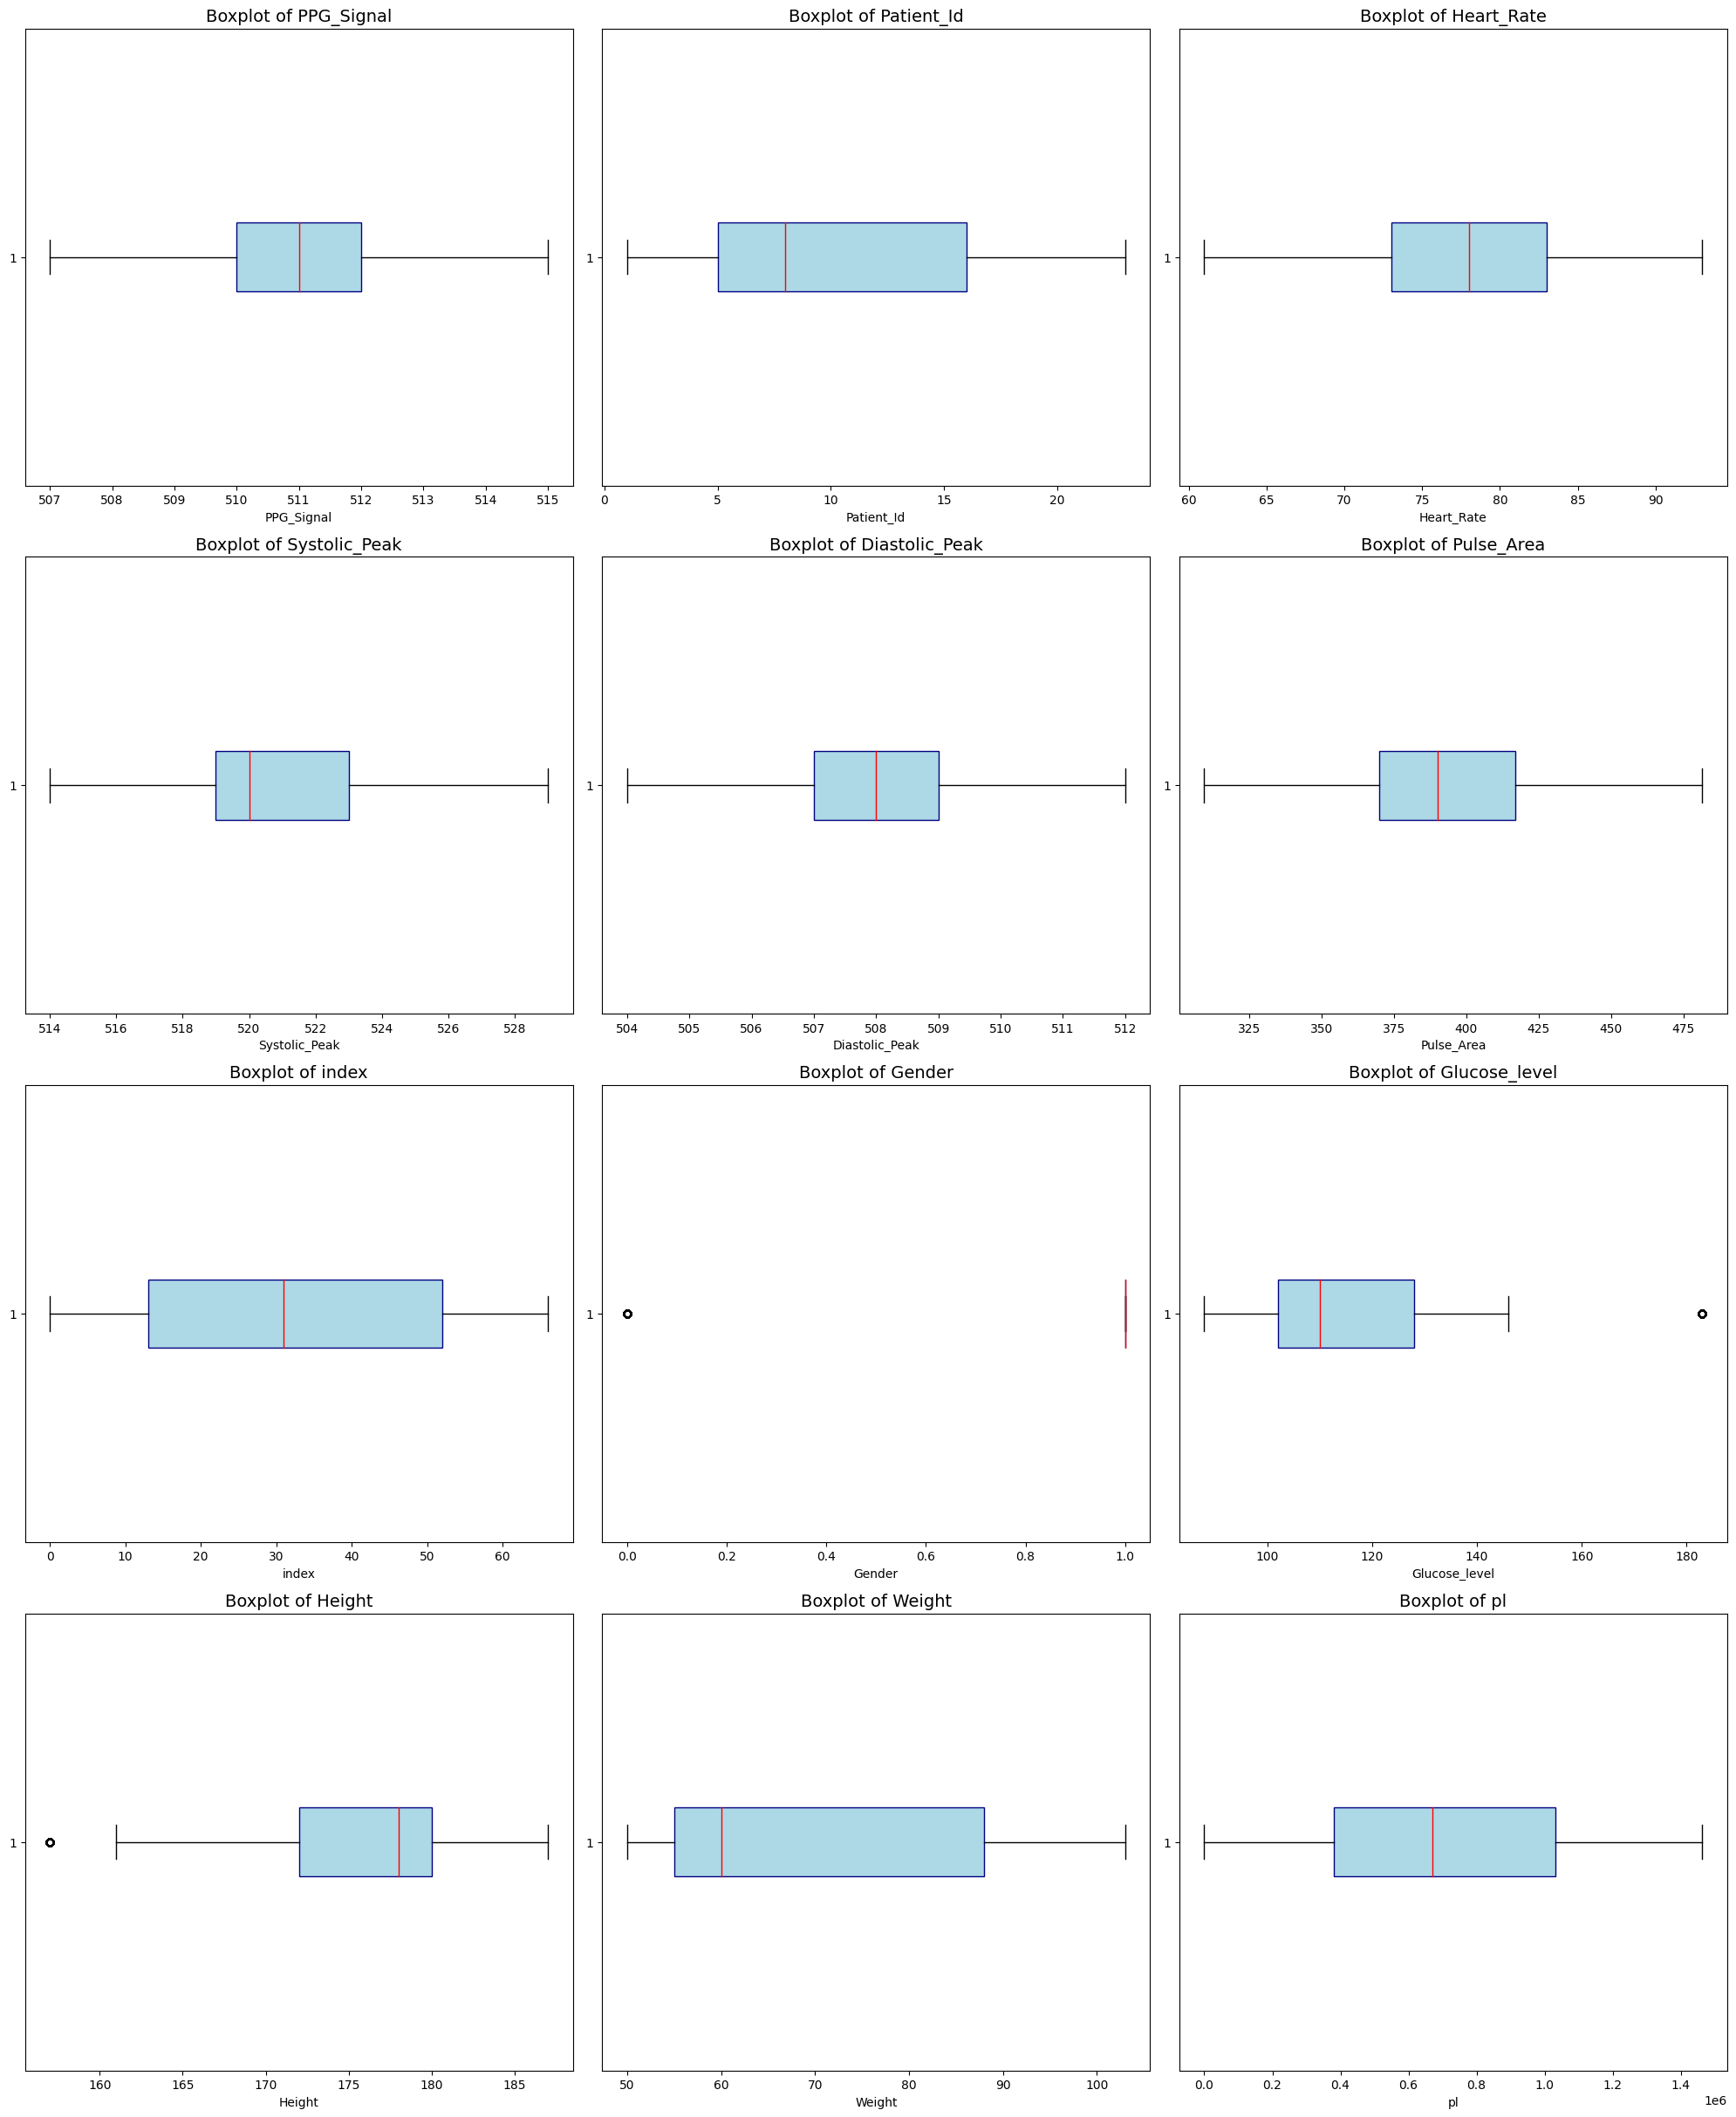

In [23]:
def plot_boxplots_alternative(df):
    num_columns = df.select_dtypes(include='number').columns
    num_features = len(num_columns)
    rows = (num_features // 3) + 1
    cols = min(num_features, 3)
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6))
    axes = axes.flatten()  # Flatten in case of more subplots
    
    for i, col in enumerate(num_columns):
        axes[i].boxplot(df[col], vert=False, patch_artist=True,
                        boxprops=dict(facecolor='lightblue', color='navy'),
                        medianprops=dict(color='red'))
        axes[i].set_title(f'Boxplot of {col}', fontsize=14)
        axes[i].set_xlabel(col)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_boxplots_alternative(df)

In [24]:
df.columns

Index(['PPG_Signal', 'Patient_Id', 'Heart_Rate', 'Systolic_Peak',
       'Diastolic_Peak', 'Pulse_Area', 'index', 'Gender', 'Glucose_level',
       'Height', 'Weight', 'pl', 'Age Range'],
      dtype='object')

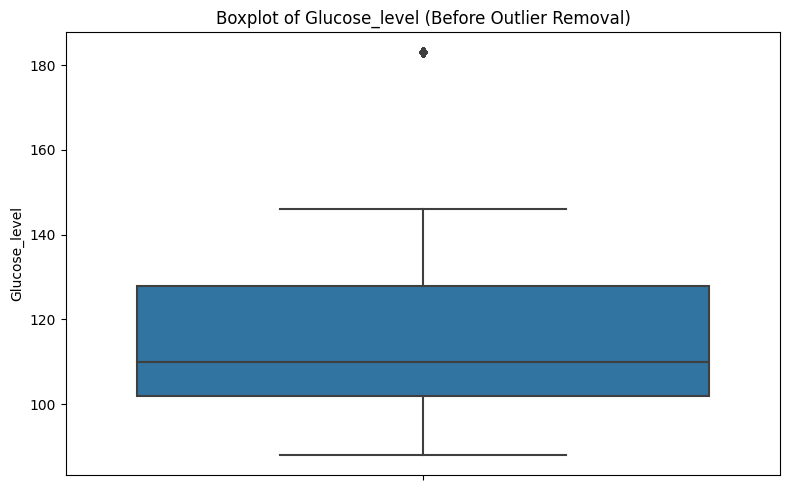

Outliers Found at Indices:
Index([522867, 522869, 522871, 522873, 522875, 522877, 522879, 522881, 522883,
       522885,
       ...
       693060, 693063, 693066, 693069, 693072, 693075, 693078, 693081, 693084,
       693087],
      dtype='int64', length=26602)

Rows containing outliers:
        PPG_Signal  Patient_Id  Heart_Rate  Systolic_Peak  Diastolic_Peak  \
522867         512          13        76.0          514.0           511.0   
522869         512          13        76.0          514.0           511.0   
522871         512          13        76.0          514.0           511.0   
522873         512          13        76.0          514.0           511.0   
522875         512          13        76.0          514.0           511.0   
...            ...         ...         ...            ...             ...   
693075         511          18        93.0          522.0           510.0   
693078         511          18        93.0          522.0           510.0   
693081         511

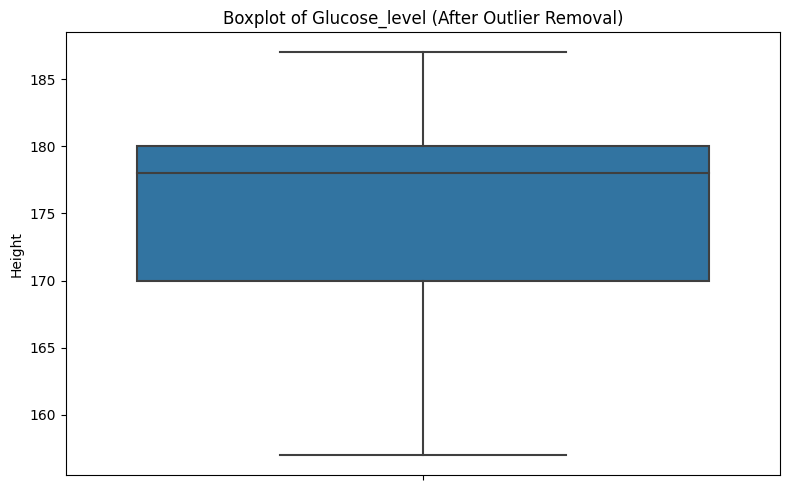

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a synthetic dataset (replace with your actual dataset)
np.random.seed(42)

# Print available columns to verify if 'Signal' is present
#print("Columns in the dataset:", df.columns)

# List of columns to handle outliers (in this case, just the 'Signal' column)
columns_with_outliers = ['Glucose_level']

# Create a boxplot for the 'Signal' column before handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Glucose_level'])
plt.title('Boxplot of Glucose_level (Before Outlier Removal)')
plt.tight_layout()
plt.show()

# Define a function to handle outliers using the IQR method
def find_outliers(df, column, iqr_multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR

    # Identify the indices of rows that are outliers
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outlier_indices

# Find the outliers in the 'Signal' column
outlier_indices = find_outliers(df, 'Glucose_level')

# Show the dataset rows that contain outliers
print("Outliers Found at Indices:")
print(outlier_indices)

# Show dataset rows containing the outliers
print("\nRows containing outliers:")
print(df.loc[outlier_indices])

# Remove outliers from the dataset
df = df.drop(outlier_indices)

# Print the size of the dataset after removing outliers
print("\nDataset size after removing outliers:", df.shape)

# Create a boxplot for the 'Signal' column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Height'])
plt.title('Boxplot of Glucose_level (After Outlier Removal)')
plt.tight_layout()
plt.show()

# Optional: Save the cleaned data to a new CSV
# df_no_outliers.to_csv('/mnt/data/cleaned_data.csv', index=False)


In [26]:
df

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Glucose_level,Height,Weight,pl,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,99,180,53,1,2
1,511,1,77.0,522.0,505.0,393.0,1,1,102,180,53,2,2
2,511,1,77.0,522.0,505.0,393.0,2,1,103,180,53,3,2
3,511,1,77.0,522.0,505.0,393.0,3,1,128,180,53,4,2
4,511,1,77.0,522.0,505.0,393.0,4,1,130,180,53,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1463368,1
844942,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1463369,1
844943,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1463370,1
844944,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1463371,1


In [27]:
# Calculate skewness for each numeric column in the DataFrame and print the result
numeric_columns = df.select_dtypes(include=['number'])  # Select only numeric columns
for column in numeric_columns.columns:
    skew_value = df[column].skew()
    print(f"Skewness of '{column}': {skew_value:.4f}")

Skewness of 'PPG_Signal': 0.2806
Skewness of 'Patient_Id': 0.4458
Skewness of 'Heart_Rate': -0.2021
Skewness of 'Systolic_Peak': -0.0570
Skewness of 'Diastolic_Peak': 0.0812
Skewness of 'Pulse_Area': 0.3989
Skewness of 'index': 0.0101
Skewness of 'Gender': -1.3466
Skewness of 'Glucose_level': 0.5332
Skewness of 'Height': -0.2644
Skewness of 'Weight': 0.7997
Skewness of 'pl': 0.1683


In [28]:
df

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Glucose_level,Height,Weight,pl,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,99,180,53,1,2
1,511,1,77.0,522.0,505.0,393.0,1,1,102,180,53,2,2
2,511,1,77.0,522.0,505.0,393.0,2,1,103,180,53,3,2
3,511,1,77.0,522.0,505.0,393.0,3,1,128,180,53,4,2
4,511,1,77.0,522.0,505.0,393.0,4,1,130,180,53,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1463368,1
844942,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1463369,1
844943,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1463370,1
844944,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1463371,1


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

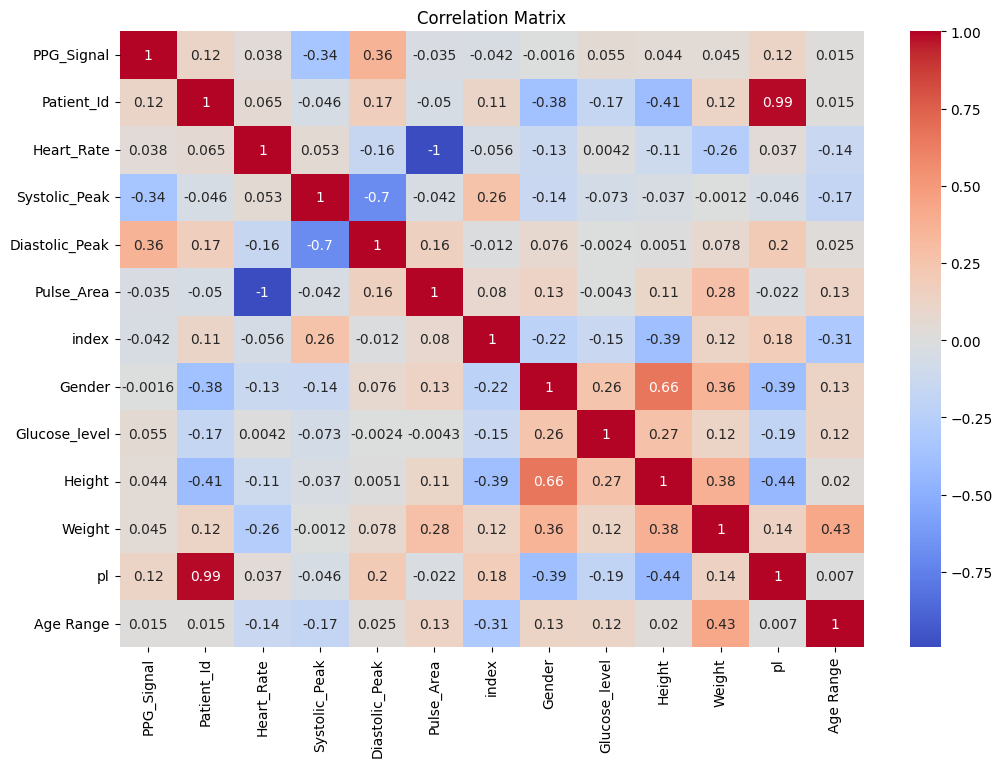

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [31]:
df.columns

Index(['PPG_Signal', 'Patient_Id', 'Heart_Rate', 'Systolic_Peak',
       'Diastolic_Peak', 'Pulse_Area', 'index', 'Gender', 'Glucose_level',
       'Height', 'Weight', 'pl', 'Age Range'],
      dtype='object')

In [32]:
# Drop columns without modifying the original DataFrame
#merged_df1 = merged_df1.drop(columns=['pl'])
# Drop columns without modifying the original DataFrame
df = df.drop(columns=['pl',])

# Check the result
#df.head()

In [33]:
df

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Glucose_level,Height,Weight,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,99,180,53,2
1,511,1,77.0,522.0,505.0,393.0,1,1,102,180,53,2
2,511,1,77.0,522.0,505.0,393.0,2,1,103,180,53,2
3,511,1,77.0,522.0,505.0,393.0,3,1,128,180,53,2
4,511,1,77.0,522.0,505.0,393.0,4,1,130,180,53,2
...,...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1
844942,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1
844943,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1
844944,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1


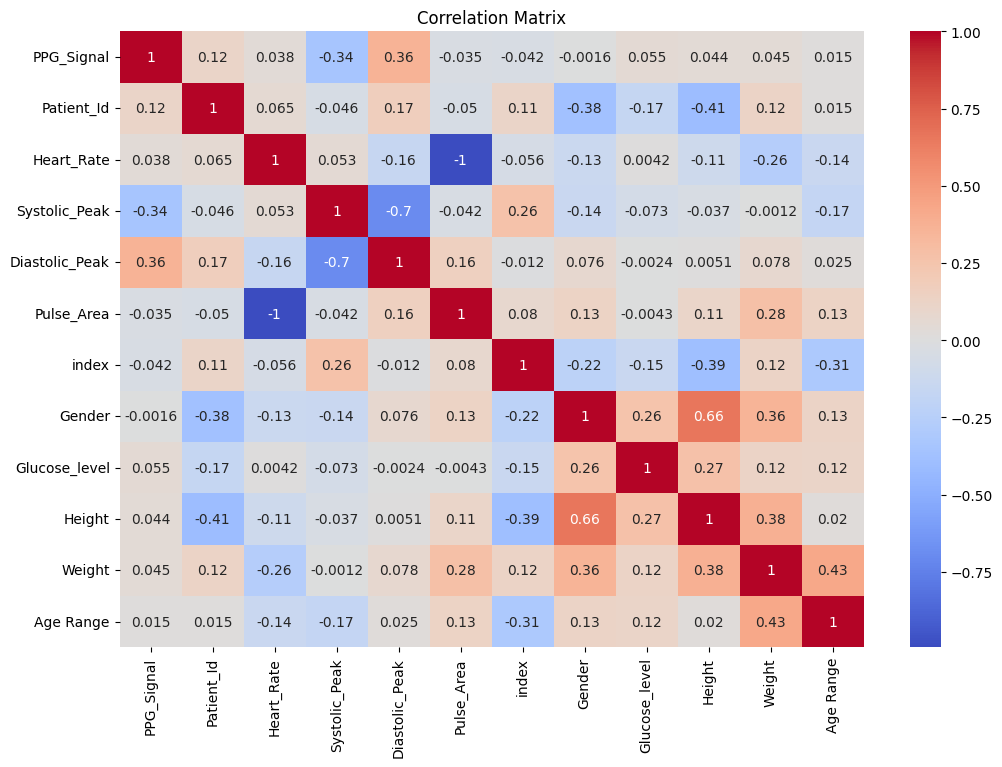

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [35]:
df.columns

Index(['PPG_Signal', 'Patient_Id', 'Heart_Rate', 'Systolic_Peak',
       'Diastolic_Peak', 'Pulse_Area', 'index', 'Gender', 'Glucose_level',
       'Height', 'Weight', 'Age Range'],
      dtype='object')

In [36]:
# Drop columns without modifying the original DataFrame
#df = df.drop(columns=['Systolic_Peak'])

# Check the result
#df.head()

In [37]:
# Apply one-hot encoding to the 'Gender' and 'City' columns
#df = pd.get_dummies(df, columns=['Gender','Age Range'],dtype=int)

# Display the result
df

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Glucose_level,Height,Weight,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,99,180,53,2
1,511,1,77.0,522.0,505.0,393.0,1,1,102,180,53,2
2,511,1,77.0,522.0,505.0,393.0,2,1,103,180,53,2
3,511,1,77.0,522.0,505.0,393.0,3,1,128,180,53,2
4,511,1,77.0,522.0,505.0,393.0,4,1,130,180,53,2
...,...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1
844942,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1
844943,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1
844944,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1


In [38]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
PPG_Signal        0
Patient_Id        0
Heart_Rate        0
Systolic_Peak     0
Diastolic_Peak    0
Pulse_Area        0
index             0
Gender            0
Glucose_level     0
Height            0
Weight            0
Age Range         0
dtype: int64


In [39]:
df

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Glucose_level,Height,Weight,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,99,180,53,2
1,511,1,77.0,522.0,505.0,393.0,1,1,102,180,53,2
2,511,1,77.0,522.0,505.0,393.0,2,1,103,180,53,2
3,511,1,77.0,522.0,505.0,393.0,3,1,128,180,53,2
4,511,1,77.0,522.0,505.0,393.0,4,1,130,180,53,2
...,...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1
844942,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1
844943,513,23,83.0,516.0,510.0,366.0,43,1,108,173,57,1
844944,513,23,83.0,516.0,510.0,366.0,42,1,100,173,57,1


In [40]:
# Step 5: Apply inverse transformation to convert the scaled data back to its original values
#df_original = scaler.inverse_transform(df)

# Step 6: Convert back to a DataFrame with original column names

#df_original = pd.DataFrame(df_original, columns=df.columns)
#print("\nOriginal Dataset after Inverse Transformation:\n", df_original)

In [41]:
#df_original

In [42]:
X = df.drop(['Glucose_level'], axis=1)
Y = df[['Glucose_level']]

In [43]:
X

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Height,Weight,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,180,53,2
1,511,1,77.0,522.0,505.0,393.0,1,1,180,53,2
2,511,1,77.0,522.0,505.0,393.0,2,1,180,53,2
3,511,1,77.0,522.0,505.0,393.0,3,1,180,53,2
4,511,1,77.0,522.0,505.0,393.0,4,1,180,53,2
...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,173,57,1
844942,513,23,83.0,516.0,510.0,366.0,42,1,173,57,1
844943,513,23,83.0,516.0,510.0,366.0,43,1,173,57,1
844944,513,23,83.0,516.0,510.0,366.0,42,1,173,57,1


In [44]:
X.columns

Index(['PPG_Signal', 'Patient_Id', 'Heart_Rate', 'Systolic_Peak',
       'Diastolic_Peak', 'Pulse_Area', 'index', 'Gender', 'Height', 'Weight',
       'Age Range'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

### Min Max Scaler

In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

### Fit the Scaler Only on the Training Set:

In [47]:
X_train_scaled = scaler_features.fit_transform(X_train)


In [48]:
X_train_scaled

array([[0.5       , 0.        , 0.5       , ..., 0.76666667, 0.05660377,
        0.25      ],
       [0.625     , 1.        , 0.28125   , ..., 0.53333333, 0.13207547,
        0.        ],
       [0.5       , 0.18181818, 0.625     , ..., 0.6       , 0.11320755,
        0.        ],
       ...,
       [0.5       , 0.        , 0.46875   , ..., 0.76666667, 0.05660377,
        0.25      ],
       [0.375     , 0.45454545, 0.6875    , ..., 0.83333333, 0.22641509,
        0.        ],
       [0.125     , 0.22727273, 0.59375   , ..., 0.26666667, 0.18867925,
        0.25      ]])

### Transform the Test Set Using the Same Scaler:

In [49]:
X_test_scaled = scaler_features.transform(X_test)

In [50]:
X_test_scaled

array([[0.25      , 0.18181818, 0.5625    , ..., 0.6       , 0.11320755,
        0.        ],
       [0.5       , 0.95454545, 1.        , ..., 0.43333333, 0.        ,
        0.        ],
       [0.625     , 0.36363636, 0.5625    , ..., 0.5       , 0.18867925,
        0.        ],
       ...,
       [0.625     , 0.04545455, 0.75      , ..., 1.        , 0.47169811,
        0.        ],
       [0.375     , 0.45454545, 0.71875   , ..., 0.83333333, 0.22641509,
        0.        ],
       [0.5       , 0.18181818, 0.5625    , ..., 0.6       , 0.11320755,
        0.        ]])

### scale for the y_train and y_test

In [51]:
# Scale the target (Glucose_level) for y_train and y_test
y_train_scaled = scaler_target.fit_transform(y_train)
y_test_scaled = scaler_target.transform(y_test)

In [52]:
y_train_scaled

array([[0.82758621],
       [0.34482759],
       [0.37931034],
       ...,
       [0.25862069],
       [0.43103448],
       [0.13793103]])

In [53]:
y_test_scaled

array([[0.82758621],
       [0.62068966],
       [0.62068966],
       ...,
       [0.39655172],
       [0.20689655],
       [0.13793103]])

#  Apply Algorithms on dataset 

### Linear Regression Model

In [54]:
#write code here
from sklearn.linear_model import LinearRegression

In [55]:
#write code here
lr = LinearRegression()             
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [56]:
#write code here
lr_predict = lr.predict(X_test_scaled)

In [57]:
lr_predict

array([[0.41185275],
       [0.3215901 ],
       [0.33928684],
       ...,
       [0.50345417],
       [0.4803961 ],
       [0.42643983]])

### Inverse transform X_test, y_test, and the predictions back to their original values

In [58]:
# Step 8: Inverse transform X_test, y_test, and the predictions back to their original values
X_test_original = scaler_features.inverse_transform(X_test_scaled)
y_test_original = scaler_target.inverse_transform(y_test_scaled)
y_pred_original = scaler_target.inverse_transform(lr_predict)

In [59]:
X_test_original

array([[509.,   5.,  79., ..., 175.,  56.,   1.],
       [511.,  22.,  93., ..., 170.,  50.,   1.],
       [512.,   9.,  79., ..., 172.,  60.,   1.],
       ...,
       [512.,   2.,  85., ..., 187.,  75.,   1.],
       [510.,  11.,  84., ..., 182.,  62.,   1.],
       [511.,   5.,  79., ..., 175.,  56.,   1.]])

In [60]:
y_test_original

array([[136.],
       [124.],
       [124.],
       ...,
       [111.],
       [100.],
       [ 96.]])

In [61]:
y_pred_original

array([[111.88745976],
       [106.65222568],
       [107.6786369 ],
       ...,
       [117.20034192],
       [115.86297381],
       [112.73351039]])

###  Evaluate Using Performance Metrics

### Mean Absolute Error

Mean Absolute Error (MAE) in the context of a linear regression model is a performance metric that measures the average magnitude of the errors between the predicted values and the actual values. It is used to quantify how close the predictions of your model are to the actual outcomes.

- Lower MAE is better:
  
The smaller the MAE, the closer your predicted values are to the actual values. A perfect model would have an MAE of 0.

In [62]:
from sklearn.metrics import mean_absolute_error

In [63]:
mae = mean_absolute_error(y_test_scaled,lr_predict)
print(f"Mean Absolute Error of the tesing data : {mae}")

Mean Absolute Error of the tesing data : 0.19709807189448006


### Mean Squared Error 

Mean Squared Error (MSE) in the context of a linear regression model is a commonly used performance metric that measures the average of the squared differences between the predicted values and the actual values. It provides a way to quantify how well your regression model predicts the dependent variable.

A very low MSE on training data but high MSE on testing data often indicates overfitting — the model has learned the training data too well, including noise, and cannot generalize well to new data. In contrast, if MSE is high on both training and testing datasets, it may indicate underfitting, meaning the model is too simple to capture the underlying pattern.

The closer the MSE is to zero, the more accurate the model is, implying that the predicted values are very close to the actual values.

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mse = mean_squared_error(y_test_scaled,lr_predict)
print(f"Mean Squared Error of testing data : {mse}")

Mean Squared Error of testing data : 0.05703854735623502


### Root Mean Squared Error (RMSE)

Root Mean Squared Error (RMSE) is a popular metric for evaluating the performance of a linear regression model. It measures the average error between the predicted and actual values in the same units as the target variable (in this case, glucose levels). RMSE is essentially the square root of the Mean Squared Error (MSE), and it is widely used because it is more interpretable than MSE, as it provides the error in the same scale as the predicted values.

RMSE can be used to compare different models. When comparing models on the same dataset, the model with the lower RMSE is generally better at making accurate predictions.

In [66]:
# Calculate Mean Squared Error
#mse = mean_squared_error(y_test,lr_predict)
import numpy as np
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error of testing data : {rmse}")

Root Mean Squared Error of testing data : 0.23882744263638345


### R-squared (R²)

R-squared (R²), also known as the coefficient of determination, is a statistical measure used to evaluate how well a linear regression model explains the variance in the dependent variable (in your case, glucose levels). It provides insight into how well the independent variables in the model are predicting the target variable.

Interpretation

𝑅^2 =0

The model explains none of the variability of the target variable. In other words, the model's predictions are no better than simply predicting the mean of the target variable for all observations.

𝑅^2 = 1

The model explains all the variability of the target variable, meaning it perfectly predicts the outcome.

𝑅^2 between 0 and 1: 

The model explains part of the variability of the outcome. The closer 
is to 1, the better the model fits the data.

For example, if 

𝑅^2 = 0.85

this means that 85% of the variance in the target variable (glucose levels) is explained by the model, while the remaining 15% is unexplained (due to factors not captured by the model).

### R2_score

In [67]:
#write code here
#mean squre error
from sklearn.metrics import r2_score
lr_r2_test= r2_score(y_test_scaled,lr_predict)

In [68]:
#print('R2 score for Linear Regression Testing Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Testing Data is:  0.10819721957201589


In [69]:
#bc124()

### Random Forest

In [70]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestRegressor

In [71]:
# Making instance and training the model
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

In [72]:
rf_reg.fit(X_train_scaled,y_train_scaled)

/tmp/ipykernel_30/3160336221.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train_scaled,y_train_scaled)


RandomForestRegressor(max_depth=5, random_state=42)

In [73]:
y_pred = rf_reg.predict(X_test_scaled)

In [74]:
# Evaluate the model's performance
mse3 = mean_squared_error(y_test_scaled, y_pred)
rmse3 = mean_squared_error(y_test_scaled, y_pred, squared=False)
mae3 = mean_absolute_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse3:.2f}")
print(f"Mean Absolute Error (MAE): {mae3:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
Mean Absolute Error (MAE): 0.11
R-squared (R2): 0.54


### Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
# Initialize the DecisionTreeRegressor (similar to DecisionTreeClassifier style)
lf_dt = DecisionTreeRegressor(max_depth=3, criterion='squared_error', random_state=100)

In [77]:
# Train the model on the training data
lf_dt.fit(X_train_scaled,y_train_scaled)

DecisionTreeRegressor(max_depth=3, random_state=100)

In [78]:
# Predict the target values for the test set
y_pred = lf_dt.predict(X_test_scaled)


In [79]:
# Evaluate the model's performance
mse4 = mean_squared_error(y_test_scaled, y_pred)
rmse4 = mean_squared_error(y_test_scaled, y_pred, squared=False)
mae4 = mean_absolute_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse4:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse4:.2f}")
print(f"Mean Absolute Error (MAE): {mae4:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.21
Mean Absolute Error (MAE): 0.15
R-squared (R2): 0.33


### Adjusted R-squared

is a modified version of the regular R-squared that accounts for the number of predictors (independent variables) in the model. It adjusts R- Squared to avoid overestimating how well the model explains the variability in the dependent variable when additional predictors are added.


In simple terms, Adjusted R-squared compensates for the fact that adding more variables to a model will always increase the regular  R- Squared even if those variables do not improve the model's predictive power. It penalizes the model for adding irrelevant features, providing a more accurate assessment of model performance, especially when multiple predictors are involved.

In [80]:
#Calculate Adjusted R-squared for the test set
#n = len(y_test)  # number of observations in the test set
#p = X_test.shape[1]  # number of predictors (features) in the test set

#adjusted_r_squared_test = 1 - (1 - lr_r2_test) * (n - 1) / (n - p - 1)
#print(f"Adjusted R-squared on the test set: {adjusted_r_squared_test}")

### Polynomial Features

This helps models capture non-linear relationships between the input features and the target variable, making simple linear models more expressive and able to approximate more complex patterns

In [81]:
#write code here
from sklearn.preprocessing import PolynomialFeatures

In [82]:
#write code here
poly_reg = PolynomialFeatures(degree=2)

### Polynomial Feature Transformation

### 1-  fit_transform()

- Purpose: 

Combines the operations of fit() and transform() into one step.

- Usage: 

Used when you need to compute the parameters (like mean, variance, etc.) of the transformation based on the training data, and then apply the transformation.

- Process:

Fit: Calculates the parameters required for the transformation (e.g., scaling factors).
Transform: Applies the transformation using these parameters to the given data.

In [83]:
 X_train_poly = poly_reg.fit_transform(X_train_scaled)

### 2-  transform()

- Purpose: Applies a transformation to data using parameters that were computed from fit().

- Usage: Used when you already have the parameters from fit() (typically on training data) and you want to apply the same transformation to new data, like test data or unseen data.

In [84]:
 X_test_poly = poly_reg.transform(X_test_scaled)

fit_transform() is used on the training dataset to learn the parameters and apply the transformation.

transform() is used on the test or unseen dataset to apply the learned transformation, ensuring consistency.

Using fit_transform() on the training data and transform() on the test data helps prevent data leakage, where information from the test set influences the model during training.

#### model training

In [85]:
#write code he

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_scaled)

LinearRegression()

In [86]:
#y_train_predicted = poly_model.predict(X_train_poly)

### Model Prediction

In [87]:
y_test_predict  = poly_model.predict(X_test_poly)

In [88]:
#write code here
#y_train_predicted,y_test_predict = poly_model.predict(X_train_poly),poly_model.predict(X_test_poly)

### ploynomial Regression matrix performance 

In [89]:
#from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_scaled,y_test_predict)
print(f"Mean Absolute Error of the tesing data : {mae}")

Mean Absolute Error of the tesing data : 0.06893090280093409


In [90]:
#from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y_test_scaled,y_test_predict)
print(f"Mean Absolute Error of testing data : {mse}")

Mean Absolute Error of testing data : 0.05703854735623502


In [91]:
#import numpy as np
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse1)
print(f"Root Mean Squared Error of testing data : {rmse}")

Root Mean Squared Error of testing data : 0.09313701562682071


In [92]:
r2_test = r2_score(y_test_scaled, y_test_predict)

#print('R2 score for Linear Regression Testing Data is: ', lr_r2_train)

print('R2 score for Poly Regression  Testing Data is: ', r2_test)

R2 score for Poly Regression  Testing Data is:  0.8643733604885401


In [93]:
y_test_scaled

array([[0.82758621],
       [0.62068966],
       [0.62068966],
       ...,
       [0.39655172],
       [0.20689655],
       [0.13793103]])

In [94]:
y_test_predict

array([[0.78390151],
       [0.65652239],
       [0.55547893],
       ...,
       [0.41847203],
       [0.23054237],
       [0.18168164]])

In [95]:
# Inverse transform the scaled values
y_test_actual = scaler_target .inverse_transform(y_test_scaled)
y_test_predict_actual = scaler_target .inverse_transform(y_test_predict)


# Show the model predictions vs actual values
y_test_actual = pd.Series(y_test_actual.flatten(), name='Actual Glucose Level')
y_test_predict_actual = pd.Series(y_test_predict_actual.flatten(), name='Predicted Glucose Level')
predictions = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_test_predict_actual})
predictions

,Actual,Predicted
0,136.0,133.466288
1,124.0,126.078298
2,124.0,120.217778
3,136.0,123.102675
4,96.0,91.423398
...,...,...
148990,108.0,111.327062
148991,108.0,111.327062
148992,111.0,112.271378
148993,100.0,101.371457


### after polynominal feature technique then make 2D data format

In [96]:
#only calculate feature not another work

feature_names = poly_reg.get_feature_names_out()
#print("Feature names:", feature_names)

In [97]:
X_train_poly_2d = pd.DataFrame(X_train_poly, columns=feature_names)
X_train_poly_2d

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x7^2,x7 x8,x7 x9,x7 x10,x8^2,x8 x9,x8 x10,x9^2,x9 x10,x10^2
0,1.0,0.500,0.000000,0.50000,0.400000,0.500,0.491279,0.090909,1.0,0.766667,...,1.0,0.766667,0.056604,0.25,0.587778,0.043396,0.191667,0.003204,0.014151,0.0625
1,1.0,0.625,1.000000,0.28125,0.066667,0.875,0.747093,0.651515,1.0,0.533333,...,1.0,0.533333,0.132075,0.00,0.284444,0.070440,0.000000,0.017444,0.000000,0.0000
2,1.0,0.500,0.181818,0.62500,0.400000,0.375,0.386628,0.818182,1.0,0.600000,...,1.0,0.600000,0.113208,0.00,0.360000,0.067925,0.000000,0.012816,0.000000,0.0000
3,1.0,0.625,0.409091,1.00000,0.200000,0.625,0.000000,0.121212,1.0,0.733333,...,1.0,0.733333,0.754717,0.25,0.537778,0.553459,0.183333,0.569598,0.188679,0.0625
4,1.0,0.500,0.000000,0.56250,0.400000,0.375,0.438953,0.075758,1.0,0.766667,...,1.0,0.766667,0.056604,0.25,0.587778,0.043396,0.191667,0.003204,0.014151,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595974,1.0,0.375,0.272727,0.00000,0.666667,0.625,1.000000,0.939394,1.0,0.733333,...,1.0,0.733333,0.811321,0.25,0.537778,0.594969,0.183333,0.658241,0.202830,0.0625
595975,1.0,0.500,0.045455,0.28125,0.333333,0.375,0.747093,0.484848,1.0,1.000000,...,1.0,1.000000,0.471698,0.00,1.000000,0.471698,0.000000,0.222499,0.000000,0.0000
595976,1.0,0.500,0.000000,0.46875,0.533333,0.375,0.520349,0.030303,1.0,0.766667,...,1.0,0.766667,0.056604,0.25,0.587778,0.043396,0.191667,0.003204,0.014151,0.0625
595977,1.0,0.375,0.454545,0.68750,0.600000,0.625,0.328488,0.181818,1.0,0.833333,...,1.0,0.833333,0.226415,0.00,0.694444,0.188679,0.000000,0.051264,0.000000,0.0000


In [98]:
X_test_poly_2d = pd.DataFrame(X_test_poly, columns=feature_names)
X_test_poly_2d

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x7^2,x7 x8,x7 x9,x7 x10,x8^2,x8 x9,x8 x10,x9^2,x9 x10,x10^2
0,1.0,0.250,0.181818,0.56250,0.466667,0.375,0.456395,0.848485,1.0,0.600000,...,1.0,0.600000,0.113208,0.0,0.360000,0.067925,0.000000,0.012816,0.00000,0.0000
1,1.0,0.500,0.954545,1.00000,0.800000,0.125,0.084302,0.621212,0.0,0.433333,...,0.0,0.000000,0.000000,0.0,0.187778,0.000000,0.000000,0.000000,0.00000,0.0000
2,1.0,0.625,0.363636,0.56250,0.133333,0.750,0.462209,1.000000,0.0,0.500000,...,0.0,0.000000,0.000000,0.0,0.250000,0.094340,0.000000,0.035600,0.00000,0.0000
3,1.0,0.875,0.772727,1.00000,0.600000,0.750,0.000000,0.409091,1.0,0.766667,...,1.0,0.766667,0.754717,0.0,0.587778,0.578616,0.000000,0.569598,0.00000,0.0000
4,1.0,0.125,0.227273,0.43750,0.666667,0.000,0.555233,0.863636,0.0,0.266667,...,0.0,0.000000,0.000000,0.0,0.071111,0.050314,0.066667,0.035600,0.04717,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148990,1.0,0.375,0.727273,0.68750,0.333333,0.375,0.322674,0.378788,0.0,0.400000,...,0.0,0.000000,0.000000,0.0,0.160000,0.037736,0.000000,0.008900,0.00000,0.0000
148991,1.0,0.375,0.727273,0.68750,0.333333,0.375,0.322674,0.378788,0.0,0.400000,...,0.0,0.000000,0.000000,0.0,0.160000,0.037736,0.000000,0.008900,0.00000,0.0000
148992,1.0,0.625,0.045455,0.75000,0.466667,0.625,0.264535,0.484848,1.0,1.000000,...,1.0,1.000000,0.471698,0.0,1.000000,0.471698,0.000000,0.222499,0.00000,0.0000
148993,1.0,0.375,0.454545,0.71875,0.333333,0.250,0.311047,0.151515,1.0,0.833333,...,1.0,0.833333,0.226415,0.0,0.694444,0.188679,0.000000,0.051264,0.00000,0.0000


In [99]:
y_train_scaled

array([[0.82758621],
       [0.34482759],
       [0.37931034],
       ...,
       [0.25862069],
       [0.43103448],
       [0.13793103]])

In [100]:
y_test_scaled

array([[0.82758621],
       [0.62068966],
       [0.62068966],
       ...,
       [0.39655172],
       [0.20689655],
       [0.13793103]])

In [101]:
y_test_predict

array([[0.78390151],
       [0.65652239],
       [0.55547893],
       ...,
       [0.41847203],
       [0.23054237],
       [0.18168164]])

### Model input then output 

In [102]:
X.columns

Index(['PPG_Signal', 'Patient_Id', 'Heart_Rate', 'Systolic_Peak',
       'Diastolic_Peak', 'Pulse_Area', 'index', 'Gender', 'Height', 'Weight',
       'Age Range'],
      dtype='object')

In [103]:
X

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Height,Weight,Age Range
0,511,1,77.0,522.0,505.0,393.0,0,1,180,53,2
1,511,1,77.0,522.0,505.0,393.0,1,1,180,53,2
2,511,1,77.0,522.0,505.0,393.0,2,1,180,53,2
3,511,1,77.0,522.0,505.0,393.0,3,1,180,53,2
4,511,1,77.0,522.0,505.0,393.0,4,1,180,53,2
...,...,...,...,...,...,...,...,...,...,...,...
844941,513,23,83.0,516.0,510.0,366.0,43,1,173,57,1
844942,513,23,83.0,516.0,510.0,366.0,42,1,173,57,1
844943,513,23,83.0,516.0,510.0,366.0,43,1,173,57,1
844944,513,23,83.0,516.0,510.0,366.0,42,1,173,57,1


In [104]:
Y

,Glucose_level
0,99
1,102
2,103
3,128
4,130
...,...
844941,108
844942,100
844943,108
844944,100


In [105]:
X_test

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Height,Weight,Age Range
305947,509,5,79.0,521.0,507.0,388.0,56,1,175,56,1
765658,511,22,93.0,526.0,505.0,324.0,41,0,170,50,1
413976,512,9,79.0,516.0,510.0,389.0,66,0,172,60,1
649421,514,18,93.0,523.0,510.0,309.5,27,1,180,90,1
335190,508,6,75.0,524.0,504.0,405.0,57,0,165,60,2
...,...,...,...,...,...,...,...,...,...,...,...
632822,510,17,83.0,519.0,507.0,365.0,25,0,169,55,1
633890,510,17,83.0,519.0,507.0,365.0,25,0,169,55,1
173720,512,2,85.0,521.0,509.0,355.0,32,1,187,75,1
455922,510,11,84.0,519.0,506.0,363.0,10,1,182,62,1


In [106]:
y_test

,Glucose_level
305947,136
765658,124
413976,124
649421,136
335190,96
...,...
632822,108
633890,108
173720,111
455922,100


#### Here's a short description for each dataset column:

- PPG_Signal(mV):   Photoplethysmogram signal value in millivolts.
  
- Patient_Id(ID number): Unique identifier for the patient.
  
- Heart_Rate(bpm): Measured heart rate in beats per minute.
  
- Systolic_Peak(mmHg): Maximum blood pressure during systole, in mmHg.
  
- Diastolic_Peak(mmHg): Minimum blood pressure during diastole, in mmHg.
  
- Pulse_Area: Area under the pulse waveform.
  
- index(integer): Index value representing the record number.
  
- Gender(1 for Male, 0 for Female): Gender of the patient, encoded as 1 for male and 0 for female.
  
- Height(cm): Patient's height in centimeters.
  
- Weight(kg): Patient's weight in kilograms.
  
- Age Range[1,2,3,4,5]: Age group of the patient represented as a categorical value.

  Here's how these labels correspond to the age ranges:

Label 1: Represents patients aged between 20 and 30 years.

Label 2: Represents patients aged between 30 and 40 years.

Label 3: Represents patients aged between 40 and 50 years.

Label 4: Represents patients aged between 50 and 60 years.

Label 5: Represents patients aged between 60 and 70 years.

In [107]:


# Define the column names
column_names = [
    'PPG_Signal(mV)', 'Patient_Id(ID number)', 'Heart_Rate(bpm)', 'Systolic_Peak(mmHg)', 'Diastolic_Peak(mmHg)',
    'Pulse_Area', 'index(integer)','Gender(1 for Male, 0 for Female)', 'Height(cm)', 'Weight(kg)','Age Range[1,2,3,4,5]'
]


# Get input from user (11 values) in a user-friendly way
input_values = []
for column_name in column_names:
    value = float(input(f"Enter value for {column_name}: "))
    input_values.append(value)
    
    

# Transform the input and make prediction
input_df = pd.DataFrame([input_values], columns=X.columns)  # Create a DataFrame to maintain feature names
input_scaled = scaler_features.transform(input_df)
input_poly = poly_reg.transform(input_scaled)
output_scaled = poly_model.predict(input_poly)

# Convert the prediction back to the original glucose level scale
output = scaler_target.inverse_transform(output_scaled)

# Show the predicted glucose level in original value
print(f"Predicted Glucose Level: {output[0][0]}")






# Show the predicted glucose level in original value
#print(f"Predicted Glucose Level: {output_scaled[0][0]}")

Enter value for PPG_Signal(mV):  512
Enter value for Patient_Id(ID number):  2
Enter value for Heart_Rate(bpm):  85
Enter value for Systolic_Peak(mmHg):  521
Enter value for Diastolic_Peak(mmHg):  509
Enter value for Pulse_Area:  355
Enter value for index(integer):  32
Enter value for Gender(1 for Male, 0 for Female):  1
Enter value for Height(cm):  187
Enter value for Weight(kg):  75
Enter value for Age Range[1,2,3,4,5]:  1


Predicted Glucose Level: 112.27137763929915


In [108]:
X_test

,PPG_Signal,Patient_Id,Heart_Rate,Systolic_Peak,Diastolic_Peak,Pulse_Area,index,Gender,Height,Weight,Age Range
305947,509,5,79.0,521.0,507.0,388.0,56,1,175,56,1
765658,511,22,93.0,526.0,505.0,324.0,41,0,170,50,1
413976,512,9,79.0,516.0,510.0,389.0,66,0,172,60,1
649421,514,18,93.0,523.0,510.0,309.5,27,1,180,90,1
335190,508,6,75.0,524.0,504.0,405.0,57,0,165,60,2
...,...,...,...,...,...,...,...,...,...,...,...
632822,510,17,83.0,519.0,507.0,365.0,25,0,169,55,1
633890,510,17,83.0,519.0,507.0,365.0,25,0,169,55,1
173720,512,2,85.0,521.0,509.0,355.0,32,1,187,75,1
455922,510,11,84.0,519.0,506.0,363.0,10,1,182,62,1
